%run feature_engineering.ipynb

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.metrics import mean_squared_error


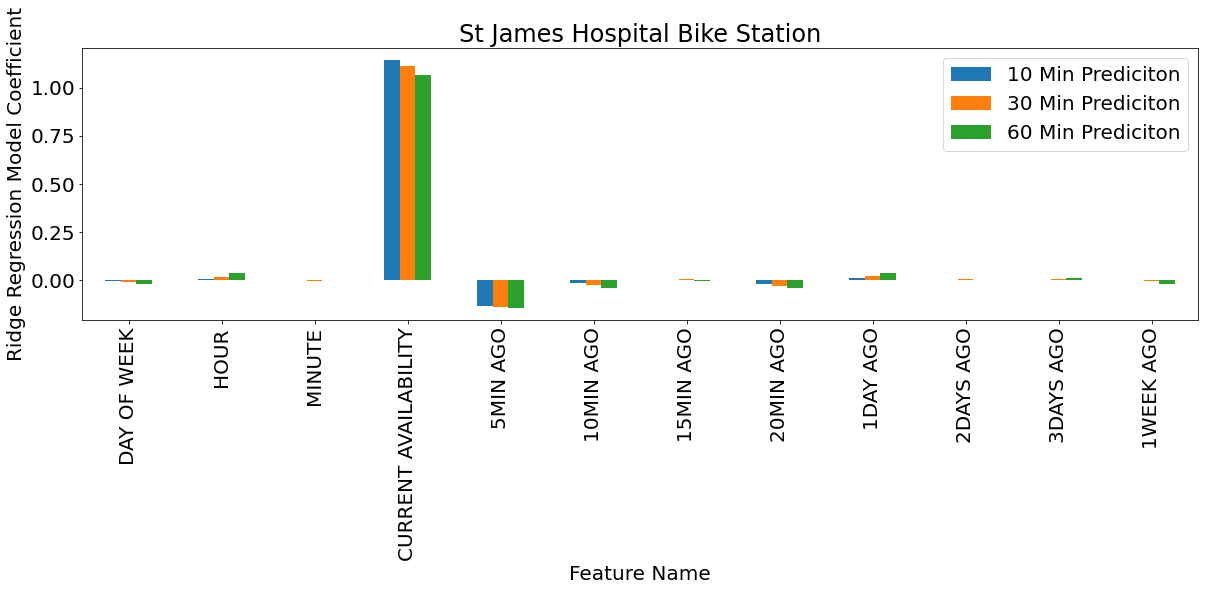

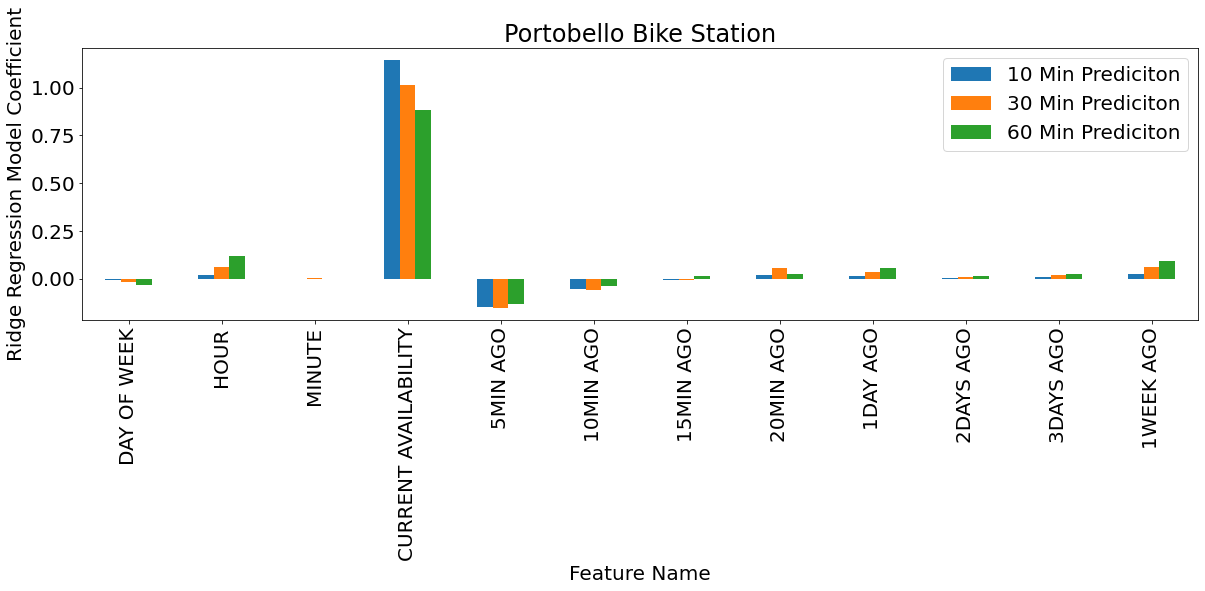

In [28]:
%run feature_engineering.ipynb

Lets save our variables from the previous notebook

In [29]:

df_hospital_map = df_hospital_map
df_portobello_map = df_portobello_map

X_hospital_map = X_hospital
y_hospital_map = y_hospital

X_portobello_map = X_portobello
y_portobello_map = y_portobello


In [30]:
def test_and_train_model(model,df :pd.DataFrame, X, y, title:str):
    cv = TimeSeriesSplit(n_splits=5)
    mse_scores=[]
    split_count=0
    X = X.to_numpy()
    y = y.to_numpy()
    for train, test in cv.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse_scores.append(mean_squared_error(y[test], ypred))
        split_count=split_count+1
        if split_count == 5:
            plt.rc('font',size=30)
            plt.figure(figsize=(30,20))
            plt.scatter(df.iloc[test].index,y[test],label="actual",marker='o')
            plt.scatter(df.iloc[test].index,ypred,label="predicted")
            plt.xlim(df.iloc[test].index[0],df.iloc[test].index[-1])
            plt.legend()
            plt.xlabel("Time")
            plt.ylabel("Available Bikes")
            

    print("MSE: "+str(np.mean(mse_scores)))
    plt.title(title+" MSE: "+str(np.mean(mse_scores)))

In [31]:
def test_and_train_model(model_name:str,model, X, y):
    
    kf = KFold(n_splits=5)
    mse_scores=[]
    
    X = X.to_numpy()
    y = y.to_numpy()
    
    for train,test in kf.split(X):
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        mse_scores.append(mean_squared_error(y[test], ypred))
    

    print(model_name+" MSE: " + str(np.mean(mse_scores)))
    

In [32]:
def visualise_models(model,df :pd.DataFrame, X, y, title:str):
    plt.rc('font',size=30)
    plt.figure(figsize=(30,20))
    plt.scatter(df.iloc[test].index,y[test],label="actual",marker='o')
    plt.scatter(df.iloc[test].index,ypred,label="predicted")
    plt.xlim(df.iloc[test].index[0],df.iloc[test].index[-1])
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Available Bikes")
    plt.title(title+" MSE: "+str(np.mean(mse_scores)))



In [33]:
df_hospital_map["60MIN"]

,BIKE STANDS,AVAILABLE BIKES,DAY OF WEEK,HOUR,MINUTE,CURRENT AVAILABILITY,5MIN AGO,10MIN AGO,15MIN AGO,20MIN AGO,1DAY AGO,2DAYS AGO,3DAYS AGO,1WEEK AGO
TIME,,,,,,,,,,,,,,
2020-02-04 00:00:02,40,0.10,0.000000,0.000000,0.000000,0.100,0.100,0.100,0.100,0.100,0.275,0.625,0.850,0.500
2020-02-04 00:05:02,40,0.10,0.000000,0.000000,0.087719,0.100,0.100,0.100,0.100,0.100,0.275,0.625,0.875,0.500
2020-02-04 00:10:02,40,0.10,0.000000,0.000000,0.175439,0.100,0.100,0.100,0.100,0.100,0.275,0.625,0.875,0.500
2020-02-04 00:15:02,40,0.10,0.000000,0.000000,0.263158,0.100,0.100,0.100,0.100,0.100,0.275,0.650,0.875,0.500
2020-02-04 00:20:02,40,0.10,0.000000,0.000000,0.350877,0.100,0.100,0.100,0.100,0.100,0.275,0.650,0.875,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12 22:35:02,40,0.55,0.333333,0.956522,0.614035,0.575,0.575,0.550,0.550,0.550,0.250,0.525,0.450,0.700
2020-03-12 22:40:02,40,0.55,0.333333,0.956522,0.701754,0.575,0.575,0.575,0.550,0.550,0.250,0.550,0.450,0.700
2020-03-12 22:45:02,40,0.55,0.333333,0.956522,0.789474,0.575,0.575,0.575,0.575,0.550,0.250,0.525,0.450,0.675


In [34]:
portobell_models_map={"10MIN":Ridge(),"30MIN":Ridge(),"60MIN":Ridge()}
for key in portobell_models_map:
    test_and_train_model(key,portobell_models_map[key], X_portobello_map[key], y_portobello_map[key])


10MIN MSE: 0.004583086924804495
30MIN MSE: 0.015299450442969726
60MIN MSE: 0.02761255896951701


In [35]:
visualise_models()

TypeError: visualise_models() missing 5 required positional arguments: 'model', 'df', 'X', 'y', and 'title'